<a class="reference external" 
    href="https://jupyter.designsafe-ci.org/hub/user-redirect/lab/tree/CommunityData/OpenSees/TrainingMaterial/training-OpenSees-on-DesignSafe/Jupyter_Notebooks/tapis_submitJob_DSapp_OpenSees_Detailed.ipynb" 
    target="_blank"
    >
<img alt="Try on DesignSafe" src="https://raw.githubusercontent.com/DesignSafe-Training/pinn/main/DesignSafe-Badge.svg" /></a>

# Step-by-Step OpenSees App
***Step-by-Step Detailed Submit an OpenSees Tapis App***

by Silvia Mazzoni, DesignSafe, 2025

This notebook serves as a template for submitting the following DesignSafe OpenSees Apps:
* openSees-express
* openSees-mp-s3
* opensees-sp-s3

**We are using previously-defined python function to streamline the process.**

In [1]:
# Local Utilities Library
# you can remove the logic associated with the local path
import sys,os
relativePath = '../OpsUtils'
if os.path.exists(relativePath):
    print("Using local utilities library")
    PathOpsUtils = os.path.expanduser(relativePath)
else:
    PathOpsUtils = os.path.expanduser('~/CommunityData/OpenSees/TrainingMaterial/training-OpenSees-on-DesignSafe/OpsUtils')
if not PathOpsUtils in sys.path: sys.path.append(PathOpsUtils)
from OpsUtils import OpsUtils

Using local utilities library


## Connect to Tapis

In [2]:
t=OpsUtils.connect_tapis()

 -- Checking Tapis token --
 Token loaded from file. Token is still valid!
 Token expires at: 2025-08-23T01:42:21+00:00
 Token expires in: 2:22:21.793185
-- LOG IN SUCCESSFUL! --


In [3]:
print('QUEUE INFO')
OpsUtils.get_system_queues(t,system_id="stampede3",display=True);

QUEUE INFO


name                                     icx  \
description      icx (CPU, standard compute)   
hpcQueueName                             icx   
maxJobs                                   -1   
maxJobsPerUser                            20   
minNodeCount                               1   
maxNodeCount                              32   
minCoresPerNode                            1   
maxCoresPerNode                           80   
minMemoryMB                                1   
maxMemoryMB                           256000   
minMinutes                                 1   
maxMinutes                              2880   

name                                                 skx  \
description      skx (CPU, recommended standard compute)   
hpcQueueName                                         skx   
maxJobs                                               -1   
maxJobsPerUser                                        60   
minNodeCount                                           1   
maxNodeCount                                         256   
minCoresPerNode                                        1   
maxCoresPerNode                                       48   
minMemoryMB                                            1   
maxMemoryMB                                       192000   
minMinutes                                             1   
maxMinutes                                          2880   

name                                                       skx-dev  \
description      skx-dev (CPU, 2 hour max, 1 job max, for testing)   
hpcQueueName                                               skx-dev   
maxJobs                                                         -1   
maxJobsPerUser                                                   3   
minNodeCount                                                     1   
maxNodeCount                                                    16   
minCoresPerNode                                                  1   
maxCoresPerNode                                                 48   
minMemoryMB                                                      1   
maxMemoryMB                                                 192000   
minMinutes                                                       1   
maxMinutes                                                     120   

name                                  pvc                               spr  \
description      pvc (GPU, Intel no CUDA)  spr (CPU, high memory bandwidth)   
hpcQueueName                          pvc                               spr   
maxJobs                                -1                                -1   
maxJobsPerUser                          4                                36   
minNodeCount                            1                                 1   
maxNodeCount                            4                                32   
minCoresPerNode                         1                                 1   
maxCoresPerNode                        96                               112   
minMemoryMB                             1                                 1   
maxMemoryMB                        128000                            128000   
minMinutes                              1                                 1   
maxMinutes                           2880                              2880   

name                                 nvdimm     h100  
description      nvdimm (CPU, large memory)     None  
hpcQueueName                         nvdimm     h100  
maxJobs                                  -1       -1  
maxJobsPerUser                            3        4  
minNodeCount                              1        1  
maxNodeCount                              1        4  
minCoresPerNode                           1        1  
maxCoresPerNode                          80       96  
minMemoryMB                               1        1  
maxMemoryMB                         4000000  1000000  
minMinutes                                1       

---
## App User Input

### Initialize

In [4]:
# initalize
tapisInput = {}
tapisInput["name"] = 'OpsTrain_JobSubmit_OpenSees'

### App Parameters

In [5]:
tapisInput["appId"] = "opensees-mp-s3" # options: "opensees-express", "opensees-mp-s3", "opensees-2p-s3"
tapisInput["appVersion"] = "latest" # always use latest in this Notebook Template

### TACC-Job Parameters
https://docs.tacc.utexas.edu/hpc/stampede3/

In [6]:
tapisInput["maxMinutes"] = 6

# OpenSees-mp-s3 and OpenSees-xp-s3 only:
if tapisInput["appId"] in ["opensees-mp-s3","opensees-sp-s3"]:
    tapisInput["execSystemId"] = "stampede3" # the app runs on stampede only
    tapisInput["execSystemLogicalQueue"] = "skx-dev" # "skx", "skx-dev"... for info: use the command 'OpsUtils.get_system_queues(t,system_id="stampede3",display=True);'
    tapisInput["nodeCount"] = 1 # limits set by which compute nodes you use
    tapisInput["coresPerNode"] = 48 # limits set by which compute nodes you use
    tapisInput["allocation"] = "DS-HPC1"


---
###  INPUT Files Parameters

#### Storage SystemTapis & Tapis Base Path in URI format
this is the very first part of your path, just above your home folder.

Options: 
* **CommunityData**
* **Published**

The following options are user or project-dependent, and require unique path input.


The following option requires additional **user-dependent** input:
* **MyData**

The following option requires additional **user- and system- dependent** input:
* **Work**

The following option requires additional **project-dependent** input:
* **MyProjects**

You can obtain a dependent tapis-URI path by performing the first step of submitting an OpenSeesMP job at the app portal: https://www.designsafe-ci.org/workspace/opensees-mp-s3

In [7]:
tapisInput['storage_system'] = 'MyData' # options: Community,MyData,Published,MyProjects,Work/stampede3,Work/frontera,Work/ls6

### We will use a utility function to get the Tapis-compatible URI:

In [8]:
OpsUtils.show_text_file_in_accordion(PathOpsUtils,['get_user_path_tapis_uri.py'])

In [9]:
tapisInput['storage_system_baseURL'] = OpsUtils.get_user_path_tapis_uri(t,tapisInput['storage_system'])

print('storage_system_baseURL:',tapisInput['storage_system_baseURL'])

found paths file: /home/jupyter/MyData/.tapis_user_paths.json
storage_system_baseURL: tapis://designsafe.storage.default/silvia


#### File Paths
The **input_folder**  is the directory of your input file.
* **DO NOT INCLUDE** the storage system, such as MyData, etc. 
* Start from the first folder within your storage-system folder.

The **Main Script** is the full name of the file that will be submitted to OpenSees. Yes you need to include the extension.

In [10]:
tapisInput['input_folder'] = '_ToCommunityData/OpenSees/TrainingMaterial/training-OpenSees-on-DesignSafe/Examples_OpenSees/BasicExamples'
tapisInput['Main Script'] = 'Ex1a_verymany.Canti2D.Push.mp.tcl'

---
### OUTPUT-Files Parameters
Where would you like your files to be archived once the job is finished?

Options: **MyData** and **Work** 

In both cases you will find them in the **tapis-jobs-archive** folder in either MyData or Work/stampede3. 

Remember, you cannot write to Projects nor CommunityData.

In [11]:
tapisInput['archive_system']='Work' # Options: MyData or Work

---
### Review User Input

In [12]:
display(tapisInput)

{'name': 'OpsTrain_JobSubmit_OpenSees',
 'appId': 'opensees-mp-s3',
 'appVersion': 'latest',
 'maxMinutes': 6,
 'execSystemId': 'stampede3',
 'execSystemLogicalQueue': 'skx-dev',
 'nodeCount': 1,
 'coresPerNode': 48,
 'allocation': 'DS-HPC1',
 'storage_system': 'MyData',
 'storage_system_baseURL': 'tapis://designsafe.storage.default/silvia',
 'input_folder': '_ToCommunityData/OpenSees/TrainingMaterial/training-OpenSees-on-DesignSafe/Examples_OpenSees/BasicExamples',
 'Main Script': 'Ex1a_verymany.Canti2D.Push.mp.tcl',
 'archive_system': 'Work'}

#### Get interpreted Tapis-App Input (Optional)
this is what will be sent as input (just informational here, and good to check input)

In [13]:
OpsUtils.show_text_file_in_accordion(PathOpsUtils,['get_tapis_job_description.py'])

In [14]:
OpsUtils.get_tapis_job_description(t,tapisInput)

found paths file: /home/jupyter/MyData/.tapis_user_paths.json


{'name': 'OpsTrain_JobSubmit_OpenSees',
 'execSystemId': 'stampede3',
 'execSystemLogicalQueue': 'skx-dev',
 'maxMinutes': 6,
 'nodeCount': 1,
 'coresPerNode': 48,
 'appId': 'opensees-mp-s3',
 'appVersion': 'latest',
 'fileInputs': [{'name': 'Input Directory',
   'sourceUrl': 'tapis://designsafe.storage.default/silvia/_ToCommunityData/OpenSees/TrainingMaterial/training-OpenSees-on-DesignSafe/Examples_OpenSees/BasicExamples'}],
 'parameterSet': {'appArgs': [{'name': 'Main Script',
    'arg': 'Ex1a_verymany.Canti2D.Push.mp.tcl'}],
  'envVariables': [],
  'schedulerOptions': [{'name': 'TACC Allocation', 'arg': '-A DS-HPC1'}]},
 'archiveSystemId': 'stampede3',
 'archiveSystemDir': 'HOST_EVAL($WORK)/tapis-jobs-archive/${JobCreateDate}/${JobName}-${JobUUID}'}

### GO!

In [15]:
OpsUtils.show_text_file_in_accordion(PathOpsUtils,['run_tapis_job.py'])

In [16]:
# We have created a function for each task and then combined them into a single function
jobReturns = OpsUtils.run_tapis_job(t,tapisInput)

Creating job_description


Are you sure you want to submit the job? (press n to cancel, any key to confirm):  


Submitting Job
Job submitted! ID: d7685f1e-56a3-4bcc-8444-019adab6e9b5-007
job_start_time: 1755904912.7243254


Do you want to monitor the job in real-time? (press n to cancel, any key to confirm):  



Real-Time Job-Status Updates...
--------------------
	 Elapsed job time: 75.59 sec	 Current Status: RUNNING
	 Elapsed job time: 149.76 sec	 Current Status: ARCHIVING		(RUNNING took 74.17 sec)
	 Elapsed job time: 1111.35 sec	 Current Status: FINISHED		(ARCHIVING took 961.59 sec)
	  Status: FINISHED	 Elapsed job time: 1111.35 sec
--------------------
Elapsed time since Job was submitted: 1111.35 sec
--------------------


Accordion(children=(Output(),), selected_index=0, titles=('Job STATUS   (d7685f1e-56a3-4bcc-8444-019adab6e9b5-…

In [17]:
jobUuid = jobReturns['jobUuid']
print('jobUuid:',jobUuid)
print('jobReturns',jobReturns.keys())

jobUuid: d7685f1e-56a3-4bcc-8444-019adab6e9b5-007
jobReturns dict_keys(['jobUuid', 'submitted_job', 'job_start_time', 'runJobStatus', 'job_description', 'JobHistory', 'JobMetadata', 'JobFiledata', 'JobStatusData'])


<hr>

### ONCE THE JOB HAS COMPLETED....

<hr>

## Get detailed Job Status, Metadata, History, Stage Durations, and Files List

In [18]:
JobStatus = OpsUtils.get_tapis_job_status(t, jobUuid)

Accordion(children=(Output(),), selected_index=0, titles=('Job STATUS   (d7685f1e-56a3-4bcc-8444-019adab6e9b5-…

In [19]:
JobMetadata = OpsUtils.get_tapis_job_metadata(t, jobUuid)

Accordion(children=(Output(),), selected_index=0, titles=('Job Metadata   (d7685f1e-56a3-4bcc-8444-019adab6e9b…

In [20]:
JobHistory = OpsUtils.get_tapis_job_history_data(t, jobUuid,print_out=True)

Accordion(children=(Output(),), selected_index=0, titles=('Job History Data   (d7685f1e-56a3-4bcc-8444-019adab…

In [21]:
AllFilesDict = OpsUtils.get_tapis_job_all_files(t, jobUuid, displayIt=10, target_dir=False)

Accordion(children=(Output(),), selected_index=0, titles=('Job Filedata   (d7685f1e-56a3-4bcc-8444-019adab6e9b…

## Visualize Data
this is the same process as what we had done when we presented the web-portal submit

---
#### get base path for output data from posted path:
Different systems in DesignSafe have different root paths

In [22]:
basePath = JobMetadata['archiveSystemDir_out']
print('basePath',basePath)

basePath /home/jupyter/Work/stampede3/tapis-jobs-archive/2025-08-22Z/OpsTrain_JobSubmit_OpenSees-d7685f1e-56a3-4bcc-8444-019adab6e9b5-007/inputDirectory


#### directory contents

In [23]:
if os.path.exists(basePath):
    print(os.listdir(basePath))
else:
    print('path does not exist')

['Ex1a_verymany.Canti2D.Push.mp.tcl', 'Ex1a.Canti2D.Push.tcl', 'Ex1a.Canti2D.Push.mpi4py.py', 'LcolList.out', 'Ex1a.Canti2D.Push.mp.tcl', 'Ex1a.Canti2D.Push.py', 'simpleSP.tcl', 'DataTCLmp', 'Ex1a.Canti2D.Push.mpi.py', 'Ex1a_many.Canti2D.Push.mp.tcl']


---
#### Plot some analysis results
for any of the above analyses

In [24]:
import matplotlib.pyplot as plt
import numpy

In [25]:
#pick any case
print('basePath:',basePath)
dataDir = f'{basePath}/DataTCLmp'; # know this from my input script, or see directory contents
print('dataDir:',dataDir)
if os.path.exists(dataDir):
    print('dataDir exists!!!')
else:
    print('dataDir DOES NOT EXIST! -- it may just need time....you may just need to re-run this and the subsequent cells')

basePath: /home/jupyter/Work/stampede3/tapis-jobs-archive/2025-08-22Z/OpsTrain_JobSubmit_OpenSees-d7685f1e-56a3-4bcc-8444-019adab6e9b5-007/inputDirectory
dataDir: /home/jupyter/Work/stampede3/tapis-jobs-archive/2025-08-22Z/OpsTrain_JobSubmit_OpenSees-d7685f1e-56a3-4bcc-8444-019adab6e9b5-007/inputDirectory/DataTCLmp
dataDir exists!!!


#### List files in folder for a specific case, also using a wildcard
You could use the following command, but it is not 100% reliable nor safe. it also doesn't return the list.
*os.system(f'ls {dataDir}/*Lcol{Lcol}.out')*

In [26]:
Lcol = 100.0

In [27]:
import glob
# Build the wildcard pattern
pattern = os.path.join(dataDir, f"*Lcol{Lcol}.out")
# Get matching files as a Python list
files = glob.glob(pattern)
for f in files:
    print(f)

/home/jupyter/Work/stampede3/tapis-jobs-archive/2025-08-22Z/OpsTrain_JobSubmit_OpenSees-d7685f1e-56a3-4bcc-8444-019adab6e9b5-007/inputDirectory/DataTCLmp/DBase_Lcol100.0.out
/home/jupyter/Work/stampede3/tapis-jobs-archive/2025-08-22Z/OpsTrain_JobSubmit_OpenSees-d7685f1e-56a3-4bcc-8444-019adab6e9b5-007/inputDirectory/DataTCLmp/RBase_Lcol100.0.out
/home/jupyter/Work/stampede3/tapis-jobs-archive/2025-08-22Z/OpsTrain_JobSubmit_OpenSees-d7685f1e-56a3-4bcc-8444-019adab6e9b5-007/inputDirectory/DataTCLmp/DFree_Lcol100.0.out
/home/jupyter/Work/stampede3/tapis-jobs-archive/2025-08-22Z/OpsTrain_JobSubmit_OpenSees-d7685f1e-56a3-4bcc-8444-019adab6e9b5-007/inputDirectory/DataTCLmp/DCol_Lcol100.0.out
/home/jupyter/Work/stampede3/tapis-jobs-archive/2025-08-22Z/OpsTrain_JobSubmit_OpenSees-d7685f1e-56a3-4bcc-8444-019adab6e9b5-007/inputDirectory/DataTCLmp/FCol_Lcol100.0.out


fname3: /home/jupyter/Work/stampede3/tapis-jobs-archive/2025-08-22Z/OpsTrain_JobSubmit_OpenSees-d7685f1e-56a3-4bcc-8444-019adab6e9b5-007/inputDirectory/DataTCLmp/DFree_Lcol100.0.out


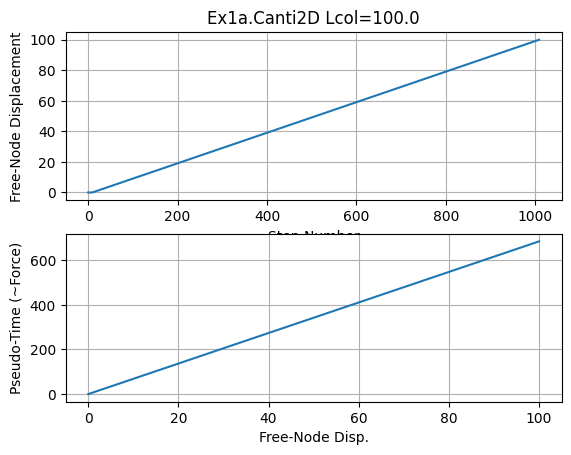

plot saved to /home/jupyter/Work/stampede3/tapis-jobs-archive/2025-08-22Z/OpsTrain_JobSubmit_OpenSees-d7685f1e-56a3-4bcc-8444-019adab6e9b5-007/inputDirectory/DataTCLmp/Response_Lcol100.0.jpg
End of Run: Ex1a.Canti2D.Push.py.ipynb


In [28]:
plt.close('all')
fname3o = f'DFree_Lcol{Lcol}.out'
fname3 = f'{dataDir}/{fname3o}'
print('fname3:',fname3)
dataDFree = numpy.loadtxt(fname3)
plt.subplot(211)
plt.title(f'Ex1a.Canti2D Lcol={Lcol}')
plt.grid(True)
plt.plot(dataDFree[:,1])
plt.xlabel('Step Number')
plt.ylabel('Free-Node Displacement')
plt.subplot(212)
plt.grid(True)
plt.plot(dataDFree[:,1],dataDFree[:,0])
plt.xlabel('Free-Node Disp.')
plt.ylabel('Pseudo-Time (~Force)')
plt.savefig(f'{dataDir}/Response.jpg')
plt.show()
print(f'plot saved to {dataDir}/Response_Lcol{Lcol}.jpg')
print('End of Run: Ex1a.Canti2D.Push.py.ipynb')


In [29]:
print('Done!')

Done!
